# Programação Inteira com SCIP

## Brevíssima introdução à utilização do SCIP em Python

Nesta UC usaremos a biblioteca [OR-Tools](https://developers.google.com/optimization) para fazer a interface para o SCIP. Esta biblioteca pode ser instalada com o commando `pip install ortools`.

In [ ]:
!pip install ortools

A documentação do OR-Tools pode ser encontrada em https://developers.google.com/optimization/introduction/overview.

Para resolver um problema de programação inteira com esta biblioteca é necessário seguir uma série de passos:
1. Importar a biblioteca de programação linear do OR-Tools usando o comando `from ortools.linear_solver import pywraplp`
1. Criar uma instância do *solver* com o método `pywraplp.Solver.CreateSolver('SCIP')`.
1. Adicionar as variáveis do problema. Para criar uma variável inteira deve ser usado o método `IntVar` que recebe 3 parâmetros: o limite inferior, o limite superior, e o nome da variável. Na definição dos limites pode ser usada a constante `solver.infinity()`. O método `NumVar` pode ser usado para criar uma variável contínua, e o método `BoolVar` para criar uma variável inteira binária. Neste último caso, o método só tem um parâmetro que é o nome da variável, sendo os limites pré-definidos como 0 e 1.
1. Adicionar as restrições do problema usando o método `Add`. A restrição é definida com a sintaxe normal Python, podendo também ser usada a função `sum` para fazer o somatório de uma lista de expressões aritméticas.
1. Definir o objectivo do problema com os métodos `Maximize` ou `Minimize`, que recebem como parâmetro a função objectivo. Mais uma vez a função objectivo é definida com a sintaxe usual do Python. Este passo é opcional: se não for definido um objectivo será calculada uma qualquer solução.
1. Invocar o solver com o método `Solve`. Este método pode devolver um dos seguintes códigos:
  - `pywraplp.Solver.OPTIMAL`, quando é possível resolver o problema.
  - `pywraplp.Solver.INFEASIBLE`, quando não é possível resolver o problema.
  - `pywraplp.Solver.UNBOUNDED`, quando a solução não está limitada superiormente (no caso do `Maximize`) ou inferiormente (no caso do `Minimize`).
1. Interpretar os resultados no caso do resultado ser `pywraplp.Solver.OPTIMAL`. Para saber o valor de uma variável pode ser usado o método `solution_value`, que devolve sempre um `double`. Também é possível aceder à função objectivo com o método `Objective` e ao respectivo valor com o método `Value`. Para converter o valor do tipo `double` para um `int` deve ser usada a função `round`, pois o valor pode sofrer de pequenos erros de precisão.

Por exemplo, o programa seguinte tenta encontrar $x$ e $y$ que minimizem $3x+4y$ satisfazendo as seguintes restrições:

$$
\left\{
\begin{array}{l}
5x + 6y \ge 11\\
7x + 5y \ge 5\\
x \ge 0\\
y \ge 0
\end{array}
\right.
$$

In [ ]:
# Importar biblioteca
from ortools.linear_solver import pywraplp
# Criar instância do solver
solver = pywraplp.Solver.CreateSolver('SCIP')
# Adicionar variáveis
x = solver.IntVar(0.0,solver.infinity(),"x") #solver.IntVar(limite inf, limite sup,nome)
y = solver.IntVar(0.0,solver.infinity(),"y")
# Adicionar restrições
solver.Add(5*x + 6*y >= 11)
solver.Add(7*x + 5*y >= 5)
# Definir objectivo
solver.Minimize(3*x + 4*y)
# Invocar o solver
status = solver.Solve()
# Interpretar os resultados
if status == pywraplp.Solver.OPTIMAL:
    print ("x = ",round(x.solution_value()))
    print ("y = ",round(y.solution_value()))
    print ("objectivo = ",round(solver.Objective().Value()))

x =  1
y =  1
objectivo =  7


## Grafos coloridos em `NetworkX`

Os vértices e as arestas de um grafo em `NetworkX` podem ter atributos. Por exemplo, podemos usar o atributo `color` para definir a cor de cada vértice. Os atributos podem ser definidos de muitas formas, por exemplo, usando a função `set_node_attributes`. O código seguinte começa por gerar o grafo de Petersen, um conhecido grafo com 10 vértices (https://en.wikipedia.org/wiki/Petersen_graph), usando a função `petersen_graph`. Depois define o atributo `color` de todos os vértices com a cor `red`.

In [ ]:
import networkx as nx

petersen = nx.petersen_graph()
nx.set_node_attributes(petersen,'red','color')
print(petersen.nodes.data())

[(0, {'color': 'red'}), (1, {'color': 'red'}), (2, {'color': 'red'}), (3, {'color': 'red'}), (4, {'color': 'red'}), (5, {'color': 'red'}), (6, {'color': 'red'}), (7, {'color': 'red'}), (8, {'color': 'red'}), (9, {'color': 'red'})]


É possível alterar ou acrescentar um atributo a um vértice acedendo ao respectivo dicionário de atributos.

In [ ]:
petersen.nodes[0]['color'] = 'yellow'
print(petersen.nodes.data())

[(0, {'color': 'yellow'}), (1, {'color': 'red'}), (2, {'color': 'red'}), (3, {'color': 'red'}), (4, {'color': 'red'}), (5, {'color': 'red'}), (6, {'color': 'red'}), (7, {'color': 'red'}), (8, {'color': 'red'}), (9, {'color': 'red'})]


Infelizmente, a função `draw` não tem este atributo em consideração. Um dos parâmetros da função `draw` é o `node_color`, que permite definir uma cor para todos os vértices ou passar uma lista com uma cor diferente para cada vértice.

### Exercício 1

Defina uma função `draw_with_colors` que, dado um grafo onde os vértices têm o atributo `color` definido, desenhe esse grafo tendo as cores nesse atributo em consideração.

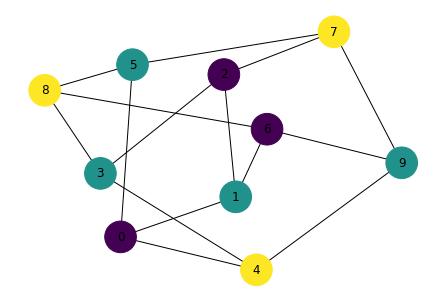

In [ ]:
def draw_with_colors(graph):
    nx.draw(graph,with_labels=True,node_size=1000,node_color = [graph.nodes[n]['color'] for n in graph],font_weight='bold')

    
draw_with_colors(petersen)

## O problema da coloração de grafos

O problema da *coloração de grafos* (https://en.wikipedia.org/wiki/Graph_coloring) consiste em descobrir uma atribuição de cores aos vértices, de tal forma que vértices adjacentes não tenham a mesma cor. Temos duas variantes deste problema:
- Problema de decisão: dado um grafo e um número não negativo $k$ determinar se é possível colorir o grafo com no máximo $k$ cores, devolvendo uma coloração válida se tal for possível.
- Problema de optimização: dado um grafo determinar o menor $k$ para o qual isso é possível (o *número cromático* do grafo).

Por exemplo, o grafo de Petersen tem número cromático 3.

### Exercício 2

Defina a função `valid_color` que testa se um grafo tem uma coloração válida.

In [ ]:
def valid_color(graph):
    for i in graph:
        for j in graph[i]:
            if (graph.nodes[i]['color'] == graph.nodes[j]['color']):
                return False
    return True
    

    
assert not valid_color(petersen)

É possível definir uma função que testa se é possível colorir um grafo com $k$ cores usando uma técnica de pesquisa exaustiva.

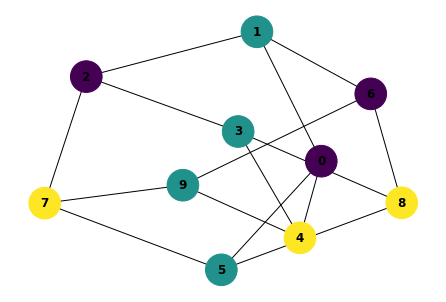

In [ ]:
def brute_force_color(graph,k):
    color = {}
    # tenta-se preencher o dicionário color com uma coloração válida                  
    if aux(graph,k,color):
        # se for possível então transferem-se as cores
        # para o atributo color dos nós
        for n in graph:
          graph.nodes[n]['color'] = color[n]
        return True
    else:
        return False

# função recursiva que tenta extender o dicionário
# color (incialmente vazio) com uma coloração válida para o grafo
def aux(graph,k,color):
    if len(color) == len(graph):   
        # se o dicionário já tem uma cor para cada nó então
        # testa-se se é válida
        for o in graph:
            for d in graph[o]:
                if color[o] == color[d]:
                    return False
        return True
    # senão escolhe-se o próximo nó a colorir
    v = list(graph.nodes)[len(color)]
    for c in range(k):
        # tenta-se colorir esse nó com uma das cores possíveis
        color[v] = c
        # e recursivamente tenta-se colorir os restantes e
        # obter uma coloração válida
        if aux(graph,k,color): 
            # se for possível termina a pesquisa
            return True
        # se não for possível tenta-se com outra cor
        color.pop(v)
    return False

assert not brute_force_color(petersen,2)
assert brute_force_color(petersen,3)
draw_with_colors(petersen)

É também possível definir uma função de ordem superior, que dado um grafo e uma função que testa se é possível colorir um grafo com $k$ cores, implementa uma solução para o problema de optimização referido acima (determinar o número cromático) testando sucessivamente todos os valores possíveis para $k$.

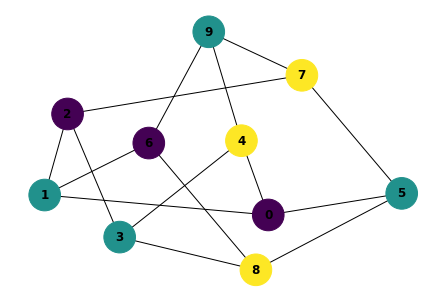

In [ ]:
def find_optimal_coloring(graph,testa):
    k = 0
    while not testa(graph,k):
        k += 1
    return k

assert find_optimal_coloring(petersen,brute_force_color) == 3
draw_with_colors(petersen)

## Modelação da coloração de grafos com Programação Inteira

É possível usar programação inteira para resolver o problema de colorir um grafo $(V,E)$ com $k$ cores. Para tal, vamos necessitar de $|V| \times k$ variáveis inteiras binárias, onde a variável $x_{v,c}$ determina se o vértice $v$ tem cor $c$. Temos também as seguintes restrições:

1. Para cada aresta $(o,d) \in E$ e cor $0 <= c < k$, $o$ e $d$ não podem ter ambos a cor $c$.
1. Cada vértice $v$ tem exactamente uma cor.

### Exercício 3

Indique as fórmulas que modelam estas duas restrições.

1. $\forall (o,d) \in E,c . x_{o,c} + x_{d,c} \le 1$
1. $\forall v \in V. \sum_c x_{v,c} = 1$

### Exercício 4

Defina a seguinte função que testa se é possível colorir um grafo com $k$ cores usando o OR-Tools com o *solver* SCIP. Se for possível, deve guardar a coloração no grafo (no atributo `color`). Sugere-se que use um dicionário `x` para guardar as varáveis, sendo que em `x[v][c]` será armazenada a variável $x_{v,c}$. Para criar um nome único para as variáveis sugere-se que use a [primitiva de formatação posicional do Python similar ao `printf`](https://docs.python.org/3/library/stdtypes.html#old-string-formatting). Por exemplo, pode usar a expressão `'x[%i][%i]' % (v,c)` para criar o nome para a variável em ``x[v][c]``.

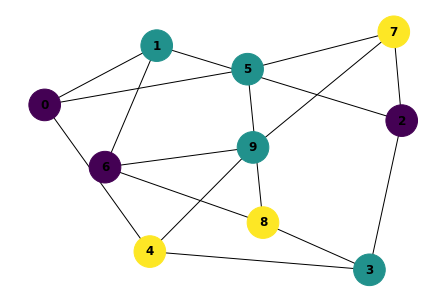

In [ ]:
def ip_color(graph,k):
    # criar solver
    solver = pywraplp.Solver.CreateSolver('SCIP')
    #criar dicionario de variaveis x{i,j} 
    x = {}
    for i in graph:
      x[i] = {}
      for j in range(k):
        x[i][j] = solver.BoolVar('x[%i][%i]' % (i,j))
      
    # vertices adjacentes tem cores diferentes
    for o in graph:
      for d in graph[o]:
        for j in range(k):
          solver.Add(x[o][j] + x[d][j] <= 1)
    
    # cada vertice adjacente tem cores diferentes

    for i in graph:
      solver.Add(sum([x[i][j] for j in range(k)]) == 1)  # ou solver.Add(sum(list(x[i].values())) == 1) 

    # invocar solver e colorir o grafo

    status = solver.Solve()
    if status == pywraplp.Solver.OPTIMAL:

      # colorir

      for i in graph:
        for j in range(k):
          if round(x[i][j].solution_value()) == 1:
            graph.nodes[i]['color'] = j
          return True
      else:
        return False

    

assert ip_color(petersen,3)
draw_with_colors(petersen)

### Exercício 5

Compare a eficiência desta solução com a implementação *brute force* acima. Sugere-se que utilize grafos completos nessa comparação, sendo que, nestes grafos, o número cromático é igual ao número de vértices.

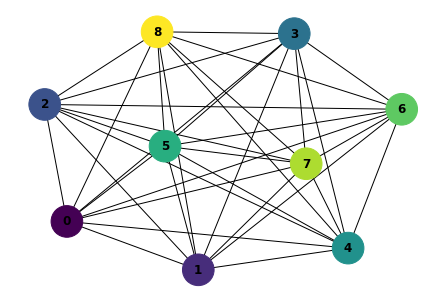

In [ ]:
complete = nx.complete_graph(9)
assert brute_force_color(complete,9)
draw_with_colors(complete)

In [ ]:
complete = nx.complete_graph(9)
assert ip_color(complete,9)
draw_with_colors(complete)

### Exercício 6

Como o SCIP suporta problemas de optimização em programação inteira, podemos implementar directamente o problema de optimização da coloração de grafos sem usar um método de pesquisa linear que tenta todos os possíveis números cromáticos. O objectivo deste exercício é implementar este problema em SCIP, ou seja, determinar uma coloração válida que minimize o número de cores.

Sugere-se que, para além das variáveis binárias que usou no exercício 4, utilize uma variável binárias $u_c$ por cada cor $c$ possível (note que num grafo o número máximo de cores necessário será idêntico ao número de vértices). Esta variável deve ter o valor 1 sse a cor $c$ for usada nalgum vértice. Dado este conjunto de variáveis o objectivo da optimização será minimizar:

$$
\sum_c u_c
$$

O valor de cada variável $u_c$ pode ser definido como o valor máximo das variáveis $x_{v,c}$ para todo o vértice $v$.

In [ ]:
def ip_find_optimal_coloring(graph):
     # criar solver
    solver = pywraplp.Solver.CreateSolver('SCIP')

    k = len(graph)
    #criar variaveis

    u = {}
    for c in range(k):
      u[c] = solver.BoolVar('u[%i]' % c)

    #criar dicionario de variaveis x{i,j} 
    x = {}
    for i in graph:
      x[i] = {}
      for j in range(k):
        x[i][j] = solver.BoolVar('x[%i][%i]' % (i,j))
      
    # vertices adjacentes tem cores diferentes
    for o in graph:
      for d in graph[o]:
        for j in range(k):
          solver.Add(x[o][j] + x[d][j] <= 1)
    
    # cada vertice adjacente tem exatamente uma cor

    for i in graph:
      solver.Add(sum([x[i][j] for j in range(k)]) == 1)  # ou solver.Add(sum(list(x[i].values())) == 1)

    #todo v,c tal que x vc <= u c e depois minimizar

    # invocar solver e colorir o grafo

    status = solver.Solve()
    if status == pywraplp.Solver.OPTIMAL:

      # colorir

      for i in graph:
        for j in range(k):
          if round(x[i][j].solution_value()) == 1:
            graph.nodes[i]['color'] = j
          return True
      else:
        return False
    

    
    
assert ip_find_optimal_coloring(petersen) == 3
draw_with_colors(petersen)

### Exercício 7

Compare a eficiência deste método com o método iterativo definido acima. Mais uma vez utilize grafos completos para efectuar essa comparação.

In [ ]:
complete = nx.complete_graph(9)
assert ip_color(complete,9)
draw_with_colors(complete)

In [ ]:
complete = nx.complete_graph(9)
assert ip_find_optimal_coloring(complete,9)
draw_with_colors(complete)